In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt 
#from mpl_toolkits.basemap import Basemap 
from sklearn.model_selection import TimeSeriesSplit 
plt.style.use('ggplot')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns


In [2]:
import os
import re


In [3]:
accidents = pd.read_csv('cleaned.csv')
print("Successfully")

Successfully


In [4]:
# Data Cleaning 
#Checking features which have null values in the new dataframe (if there are still any).
accidents.isnull().sum()


# In[5]:


#All The Columns in the Data 
accidents.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [5]:
#select one column from the data 
accidents["Age_band_of_driver"]


0          18-30
1          31-50
2          18-30
3          18-30
4          18-30
          ...   
12311      31-50
12312    Unknown
12313    Over 51
12314      18-30
12315      18-30
Name: Age_band_of_driver, Length: 12316, dtype: object

In [6]:
accidents["Cause_of_accident"]


0                             Moving Backward
1                                  Overtaking
2                   Changing lane to the left
3                  Changing lane to the right
4                                  Overtaking
                         ...                 
12311                           No distancing
12312                           No distancing
12313              Changing lane to the right
12314    Driving under the influence of drugs
12315              Changing lane to the right
Name: Cause_of_accident, Length: 12316, dtype: object

In [7]:
#Extract multiple columns from the dataset
accidents[["Light_conditions", "Weather_conditions", "Type_of_collision", "Cause_of_accident"]]

,Light_conditions,Weather_conditions,Type_of_collision,Cause_of_accident
0,Daylight,Normal,Collision with roadside-parked vehicles,Moving Backward
1,Daylight,Normal,Vehicle with vehicle collision,Overtaking
2,Daylight,Normal,Collision with roadside objects,Changing lane to the left
3,Darkness - lights lit,Normal,Vehicle with vehicle collision,Changing lane to the right
4,Darkness - lights lit,Normal,Vehicle with vehicle collision,Overtaking
...,...,...,...,...
12311,Daylight,Normal,Vehicle with vehicle collision,No distancing
12312,Daylight,Normal,Vehicle with vehicle collision,No distancing
12313,Daylight,Normal,Vehicle with vehicle collision,Changing lane to the right
12314,Darkness - lights lit,Normal,Vehicle with vehicle collision,Driving under the influence of drugs


In [8]:
#Extract unique values form the column 
accidents.columns
#print the unique values
accidents["Cause_of_accident"].unique()


array(['Moving Backward', 'Overtaking', 'Changing lane to the left',
       'Changing lane to the right', 'Overloading', 'Other',
       'No priority to vehicle', 'No priority to pedestrian',
       'No distancing', 'Getting off the vehicle improperly',
       'Improper parking', 'Overspeed', 'Driving carelessly',
       'Driving at high speed', 'Driving to the left', 'Unknown',
       'Overturning', 'Turnover', 'Driving under the influence of drugs',
       'Drunk driving'], dtype=object)

<AxesSubplot:>

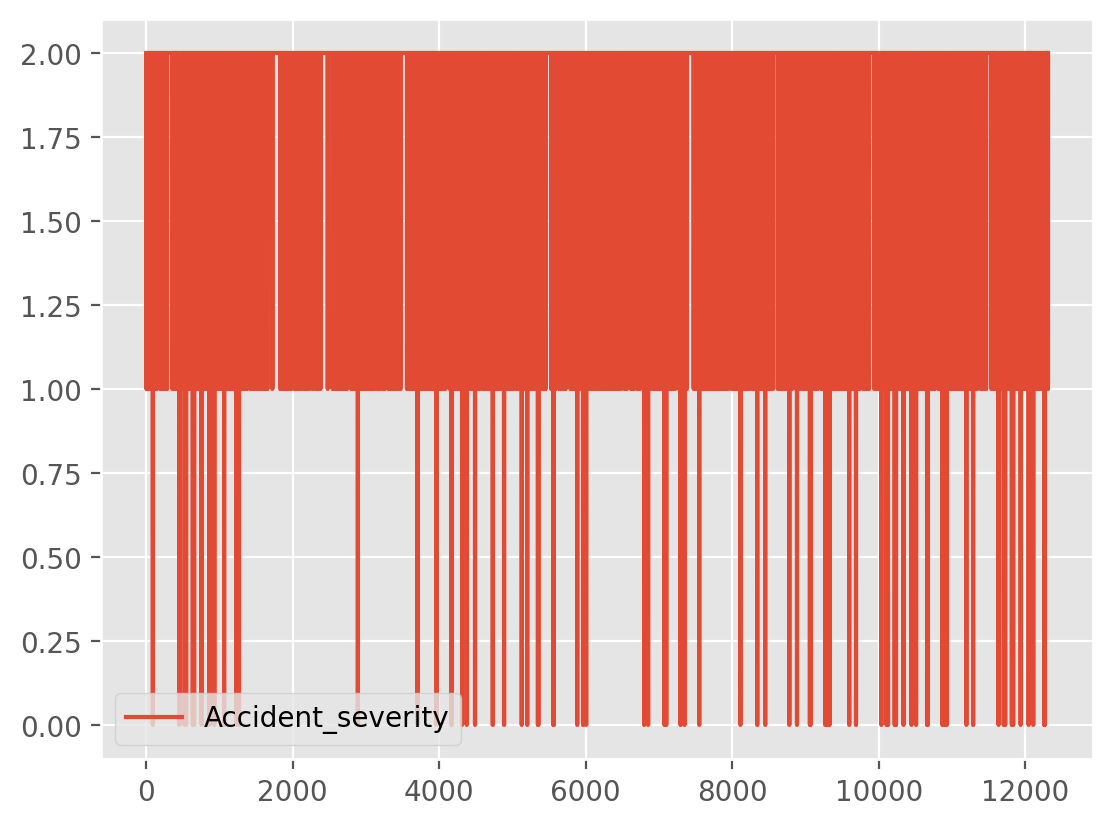

In [9]:
#Data Visualization
accidents.plot()

In [10]:
#Data Preprocessing
#Now, we categorize the features depending on their datatype (int, float, object) 
#and then calculate the number of them. 
obj = (accidents.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (accidents.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (accidents.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 14
Integer variables: 0
Float variables: 0


<AxesSubplot:>

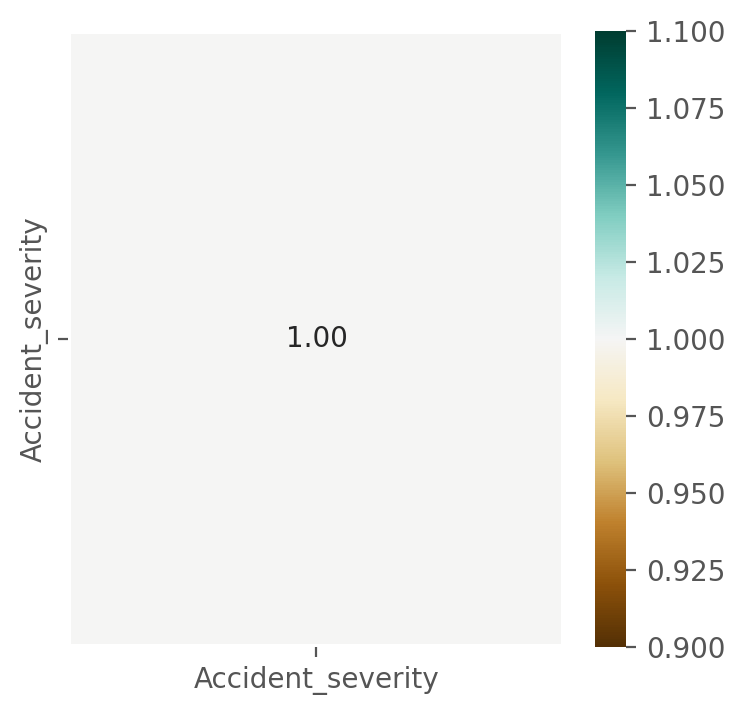

In [11]:
plt.figure(figsize=(4, 4))
sns.heatmap(accidents.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


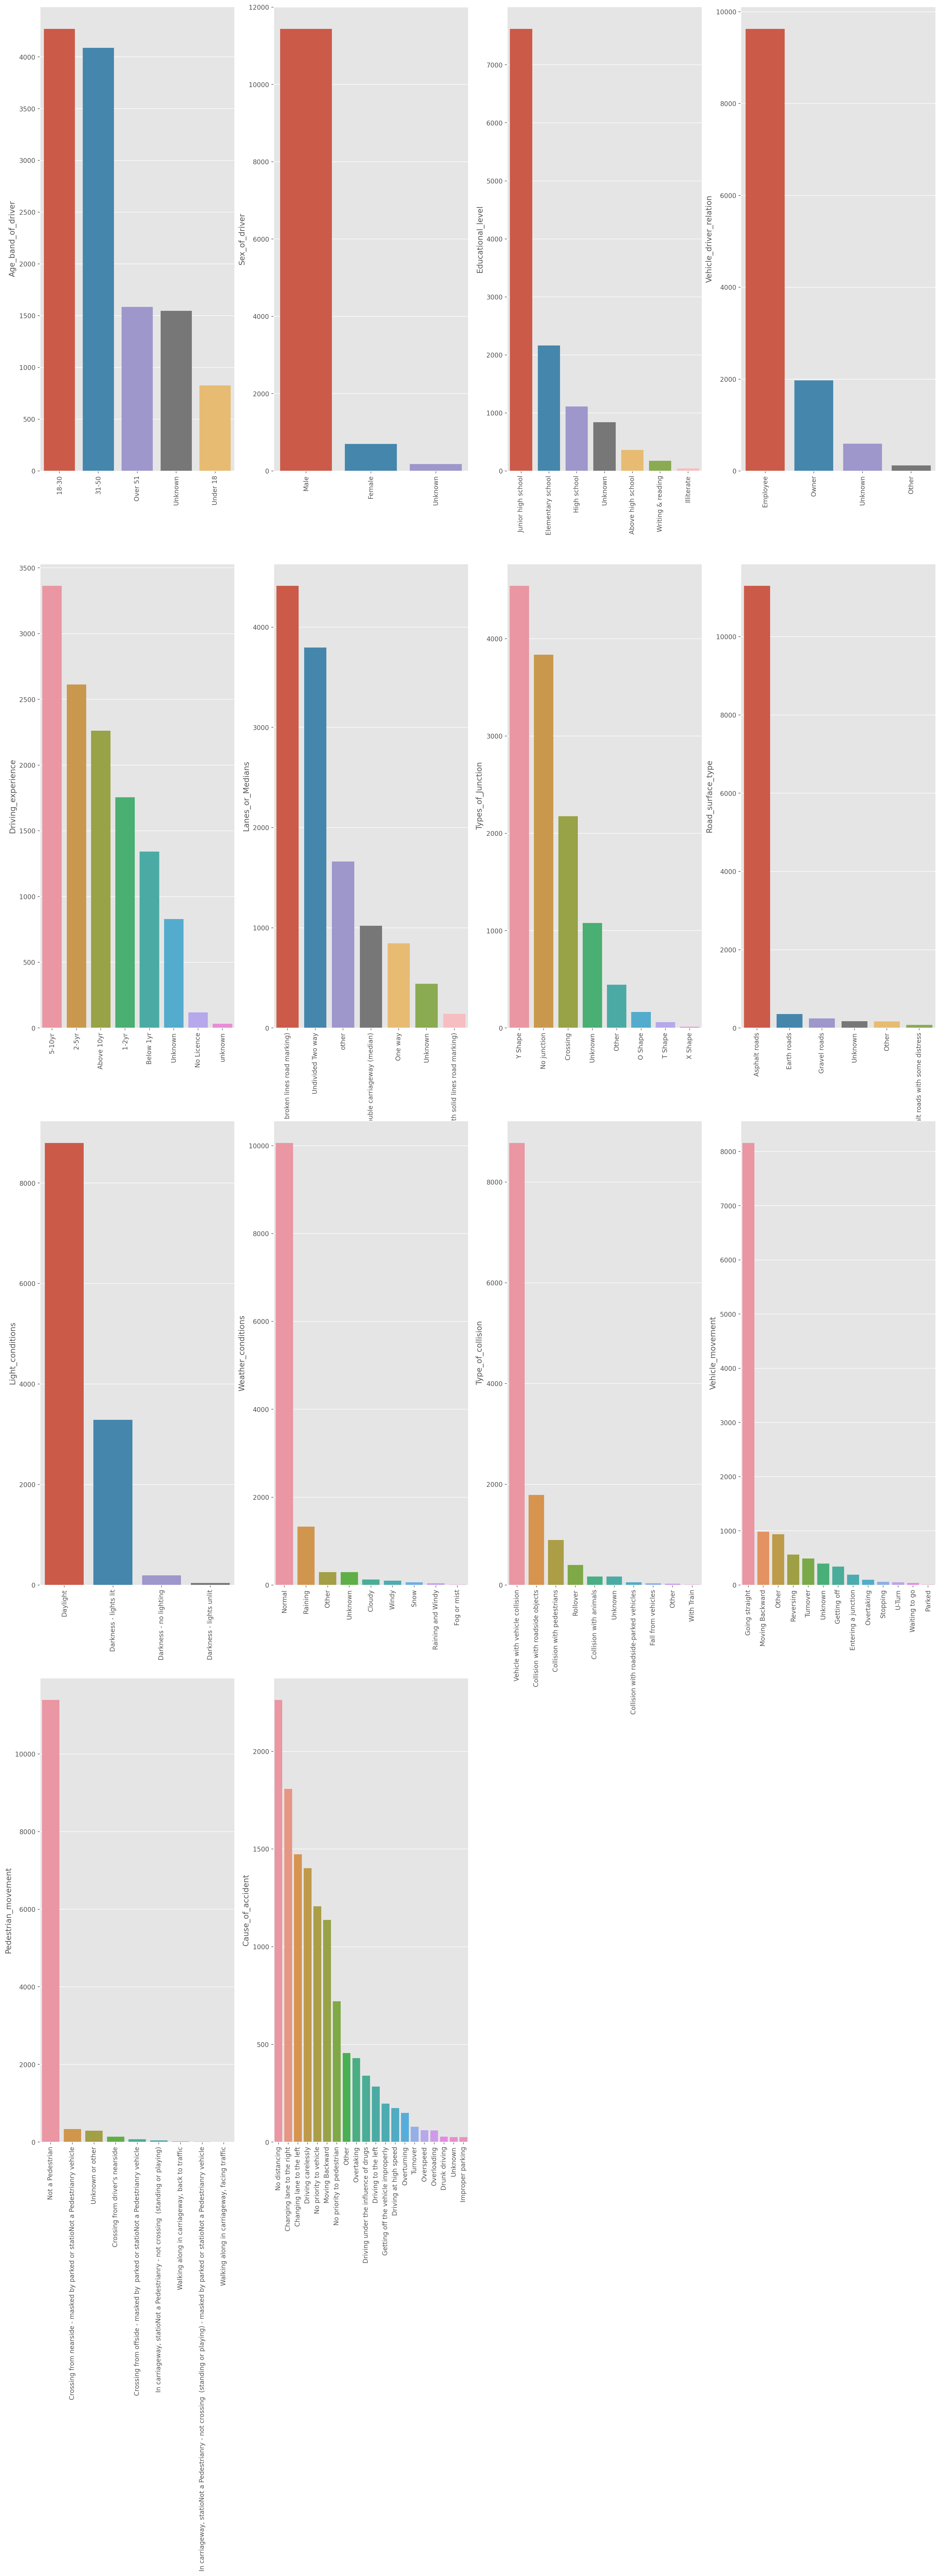

In [12]:
#To findout the actual count of each category 
#we can plot the bargraph of each feature separately.
plt.figure(figsize=(25, 60))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = accidents[col].value_counts()
    plt.subplot(4,4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


In [13]:

#checking the distribution of taget variable 'Accident_severity'
accidents['Accident_severity'].value_counts()


2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64

In [14]:
#Machine Learning 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
print("done")

done


In [15]:
X = accidents.drop('Accident_severity', axis=1)
y= accidents['Accident_severity']

# split train, test
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.30, random_state=42)  


In [16]:
#Sex and Vehicle_driver_relation
df = pd.DataFrame({'Sex_of_driver': ['Male','Female'], 'Vehicle_driver_relation': ['Employee', 'Owner']})
print(df)


  Sex_of_driver Vehicle_driver_relation
0          Male                Employee
1        Female                   Owner


In [17]:
#Cause_of_accidents
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Moving Backward'] = 1
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Overtaking'] = 2
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Changing lane to the left'] = 3
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Changing lane to the right'] = 4
accidents.Cause_of_accident[accidents.Cause_of_accident == 'No distancing'] = 5
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Driving under the influence of drugs'] = 6
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Unknown'] = 0
accidents.Cause_of_accident[accidents.Cause_of_accident == 'No priority to vehicle'] = 7
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Other'] = 8
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Driving to the left'] = 9
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Getting off the vehicle improperly'] = 10
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Driving at high speed'] = 11
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Turnover'] = 12
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Overspeed'] = 13
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Overloading'] = 14
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Improper parking'] = 15
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Driving carelessly'] = 16
accidents.Cause_of_accident[accidents.Cause_of_accident == 'No priority to pedestrian'] = 17
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Overturning'] = 18
accidents.Cause_of_accident[accidents.Cause_of_accident == 'Drunk driving'] = 19

accidents["Cause_of_accident"]

0        1
1        2
2        3
3        4
4        2
        ..
12311    5
12312    5
12313    4
12314    6
12315    4
Name: Cause_of_accident, Length: 12316, dtype: object

In [18]:
accidents["Light_conditions"]

0                     Daylight
1                     Daylight
2                     Daylight
3        Darkness - lights lit
4        Darkness - lights lit
                 ...          
12311                 Daylight
12312                 Daylight
12313                 Daylight
12314    Darkness - lights lit
12315    Darkness - lights lit
Name: Light_conditions, Length: 12316, dtype: object

In [19]:
#Light Conditions
accidents.Light_conditions[accidents.Light_conditions == 'Daylight'] = 1
accidents.Light_conditions[accidents.Light_conditions == 'Darkness - lights lit'] = 2
accidents.Light_conditions[accidents.Light_conditions == 'Darkness - no lighting'] = 3
accidents.Light_conditions[accidents.Light_conditions == 'Unknown'] = 0
accidents.Light_conditions[accidents.Light_conditions == 'Darkness - lights unlit'] = 4


accidents["Light_conditions"]

0        1
1        1
2        1
3        2
4        2
        ..
12311    1
12312    1
12313    1
12314    2
12315    2
Name: Light_conditions, Length: 12316, dtype: object

In [20]:
accidents["Weather_conditions"]

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
12311    Normal
12312    Normal
12313    Normal
12314    Normal
12315    Normal
Name: Weather_conditions, Length: 12316, dtype: object

In [21]:
#Weather Condions
accidents.Weather_conditions[accidents.Weather_conditions == 'Normal'] = 1
accidents.Weather_conditions[accidents.Weather_conditions == 'Raining'] = 2
accidents.Weather_conditions[accidents.Weather_conditions == 'Unknown'] = 0
accidents.Weather_conditions[accidents.Weather_conditions == 'Other'] = 3
accidents.Weather_conditions[accidents.Weather_conditions == 'Cloudy'] = 4
accidents.Weather_conditions[accidents.Weather_conditions == 'Windy'] = 5
accidents.Weather_conditions[accidents.Weather_conditions == 'Snow'] = 6
accidents.Weather_conditions[accidents.Weather_conditions == 'Raining and Windy'] = 7
accidents.Weather_conditions[accidents.Weather_conditions == 'Fog or mist'] = 8

accidents["Weather_conditions"]


0        1
1        1
2        1
3        1
4        1
        ..
12311    1
12312    1
12313    1
12314    1
12315    1
Name: Weather_conditions, Length: 12316, dtype: object

In [22]:

accidents["Road_surface_type"]


0        Asphalt roads
1        Asphalt roads
2        Asphalt roads
3          Earth roads
4        Asphalt roads
             ...      
12311    Asphalt roads
12312    Asphalt roads
12313    Asphalt roads
12314    Asphalt roads
12315    Asphalt roads
Name: Road_surface_type, Length: 12316, dtype: object

In [23]:
accidents.Road_surface_type[accidents.Road_surface_type == 'Asphalt roads'] = 1
accidents.Road_surface_type[accidents.Road_surface_type == 'Earth roads'] = 2
accidents.Road_surface_type[accidents.Road_surface_type == 'Unknown'] = 0
accidents.Road_surface_type[accidents.Road_surface_type == 'Gravel roads'] = 3
accidents.Road_surface_type[accidents.Road_surface_type == 'Other'] = 4
accidents.Road_surface_type[accidents.Road_surface_type == 'Asphalt roads with some distress'] = 5

accidents["Road_surface_type"]


0        1
1        1
2        1
3        2
4        1
        ..
12311    1
12312    1
12313    1
12314    1
12315    1
Name: Road_surface_type, Length: 12316, dtype: object

In [24]:

accidents["Educational_level"]

0         Above high school
1        Junior high school
2        Junior high school
3        Junior high school
4        Junior high school
                ...        
12311               Unknown
12312     Elementary school
12313    Junior high school
12314    Junior high school
12315    Junior high school
Name: Educational_level, Length: 12316, dtype: object

In [25]:
accidents.Educational_level[accidents.Educational_level == 'Above high school'] = 1
accidents.Educational_level[accidents.Educational_level == 'Junior high school'] = 2
accidents.Educational_level[accidents.Educational_level == 'Elementary school'] = 3
accidents.Educational_level[accidents.Educational_level == 'High school'] = 4
accidents.Educational_level[accidents.Educational_level == 'Unknown'] = 0
accidents.Educational_level[accidents.Educational_level == 'Writing & reading'] = 5
accidents.Educational_level[accidents.Educational_level == 'Illiterate'] = 6


accidents["Educational_level"]

0        1
1        2
2        2
3        2
4        2
        ..
12311    0
12312    3
12313    2
12314    2
12315    2
Name: Educational_level, Length: 12316, dtype: object

In [26]:

accidents["Type_of_collision"]

0        Collision with roadside-parked vehicles
1                 Vehicle with vehicle collision
2                Collision with roadside objects
3                 Vehicle with vehicle collision
4                 Vehicle with vehicle collision
                          ...                   
12311             Vehicle with vehicle collision
12312             Vehicle with vehicle collision
12313             Vehicle with vehicle collision
12314             Vehicle with vehicle collision
12315             Vehicle with vehicle collision
Name: Type_of_collision, Length: 12316, dtype: object

In [27]:
accidents.Type_of_collision[accidents.Type_of_collision == 'Collision with roadside-parked vehicles'] = 1
accidents.Type_of_collision[accidents.Type_of_collision == 'Vehicle with vehicle collision'] = 2
accidents.Type_of_collision[accidents.Type_of_collision == 'Collision with roadside objects'] = 3
accidents.Type_of_collision[accidents.Type_of_collision == 'Unknown'] = 0
accidents.Type_of_collision[accidents.Type_of_collision == 'Collision with pedestrians'] = 4
accidents.Type_of_collision[accidents.Type_of_collision == 'Rollover'] = 5
accidents.Type_of_collision[accidents.Type_of_collision == 'Collision with animals'] = 6
accidents.Type_of_collision[accidents.Type_of_collision == 'Other'] = 7
accidents.Type_of_collision[accidents.Type_of_collision == 'Fall from vehicles'] = 8
accidents.Type_of_collision[accidents.Type_of_collision == 'With Train'] = 9


accidents["Type_of_collision"]

0        1
1        2
2        3
3        2
4        2
        ..
12311    2
12312    2
12313    2
12314    2
12315    2
Name: Type_of_collision, Length: 12316, dtype: object

In [28]:
accidents["Vehicle_movement"]

0        Going straight
1        Going straight
2        Going straight
3        Going straight
4        Going straight
              ...      
12311    Going straight
12312             Other
12313             Other
12314             Other
12315          Stopping
Name: Vehicle_movement, Length: 12316, dtype: object

In [29]:
accidents.Vehicle_movement[accidents.Vehicle_movement == 'Going straight'] = 1
accidents.Vehicle_movement[accidents.Vehicle_movement == 'Other'] = 2
accidents.Vehicle_movement[accidents.Vehicle_movement == 'Stopping'] = 3
accidents.Vehicle_movement[accidents.Vehicle_movement == 'Unknown'] = 0
accidents.Vehicle_movement[accidents.Vehicle_movement == 'Moving Backward'] = 4
accidents.Vehicle_movement[accidents.Vehicle_movement == 'Reversing'] = 5
accidents.Vehicle_movement[accidents.Vehicle_movement == 'Getting off'] = 6
accidents.Vehicle_movement[accidents.Vehicle_movement == 'Entering a junction'] = 7
accidents.Vehicle_movement[accidents.Vehicle_movement == 'Overtaking'] = 8
accidents.Vehicle_movement[accidents.Vehicle_movement == 'U-Turn'] = 9
accidents.Vehicle_movement[accidents.Vehicle_movement == 'Waiting to go'] = 10
accidents.Vehicle_movement[accidents.Vehicle_movement == 'Parked'] = 11
accidents.Vehicle_movement[accidents.Vehicle_movement == 'Turnover'] = 12

accidents["Vehicle_movement"]

0        1
1        1
2        1
3        1
4        1
        ..
12311    1
12312    2
12313    2
12314    2
12315    3
Name: Vehicle_movement, Length: 12316, dtype: object

In [30]:

accidents["Types_of_Junction"]


0        No junction
1        No junction
2        No junction
3            Y Shape
4            Y Shape
            ...     
12311    No junction
12312    No junction
12313    No junction
12314    No junction
12315        O Shape
Name: Types_of_Junction, Length: 12316, dtype: object

In [31]:
accidents.Types_of_Junction[accidents.Types_of_Junction == 'No junction'] = 1
accidents.Types_of_Junction[accidents.Types_of_Junction == 'Y Shape'] = 2
accidents.Types_of_Junction[accidents.Types_of_Junction == 'O Shape'] = 3
accidents.Types_of_Junction[accidents.Types_of_Junction == 'Crossing'] = 4
accidents.Types_of_Junction[accidents.Types_of_Junction == 'Unknown'] = 0
accidents.Types_of_Junction[accidents.Types_of_Junction == 'T Shape'] = 5
accidents.Types_of_Junction[accidents.Types_of_Junction == 'X Shape'] = 6
accidents.Types_of_Junction[accidents.Types_of_Junction == 'Other'] = 7


accidents["Types_of_Junction"]

0        1
1        1
2        1
3        2
4        2
        ..
12311    1
12312    1
12313    1
12314    1
12315    3
Name: Types_of_Junction, Length: 12316, dtype: object

In [32]:
accidents["Pedestrian_movement"]

0                                         Not a Pedestrian
1                                         Not a Pedestrian
2                                         Not a Pedestrian
3                                         Not a Pedestrian
4                                         Not a Pedestrian
                               ...                        
12311                                     Not a Pedestrian
12312                                     Not a Pedestrian
12313                                     Not a Pedestrian
12314                                     Not a Pedestrian
12315    Crossing from nearside - masked by parked or s...
Name: Pedestrian_movement, Length: 12316, dtype: object

In [33]:
accidents.Pedestrian_movement[accidents.Pedestrian_movement == 'Not a Pedestrian'] = 1
accidents.Pedestrian_movement[accidents.Pedestrian_movement == 'Crossing from nearside - masked by parked or s...'] = 2
accidents.Pedestrian_movement[accidents.Pedestrian_movement == 'Unknown'] = 0
accidents.Pedestrian_movement[accidents.Pedestrian_movement == 'Unknown or other'] = 3
accidents.Pedestrian_movement[accidents.Pedestrian_movement == 'No priority to pedestrian'] = 4



accidents["Pedestrian_movement"]

0                                                        1
1                                                        1
2                                                        1
3                                                        1
4                                                        1
                               ...                        
12311                                                    1
12312                                                    1
12313                                                    1
12314                                                    1
12315    Crossing from nearside - masked by parked or s...
Name: Pedestrian_movement, Length: 12316, dtype: object

In [34]:
accidents["Age_band_of_driver"]

0          18-30
1          31-50
2          18-30
3          18-30
4          18-30
          ...   
12311      31-50
12312    Unknown
12313    Over 51
12314      18-30
12315      18-30
Name: Age_band_of_driver, Length: 12316, dtype: object

In [35]:
accidents.Age_band_of_driver[accidents.Age_band_of_driver == '18-30'] = 24
accidents.Age_band_of_driver[accidents.Age_band_of_driver == '31-50'] = 40.5
accidents.Age_band_of_driver[accidents.Age_band_of_driver == 'Under 18'] = 17
accidents.Age_band_of_driver[accidents.Age_band_of_driver == 'Over 51'] = 60
accidents.Age_band_of_driver[accidents.Age_band_of_driver == 'Unknown'] = 0

accidents["Age_band_of_driver"]

0          24
1        40.5
2          24
3          24
4          24
         ... 
12311    40.5
12312       0
12313      60
12314      24
12315      24
Name: Age_band_of_driver, Length: 12316, dtype: object

In [36]:
accidents["Driving_experience"]

0             1-2yr
1        Above 10yr
2             1-2yr
3            5-10yr
4             2-5yr
            ...    
12311         2-5yr
12312        5-10yr
12313        5-10yr
12314    Above 10yr
12315        5-10yr
Name: Driving_experience, Length: 12316, dtype: object

In [37]:
accidents.Driving_experience[accidents.Driving_experience == '1-2yr'] = 1.5
accidents.Driving_experience[accidents.Driving_experience == 'Above 10yr'] = 10.5
accidents.Driving_experience[accidents.Driving_experience == '5-10yr'] = 7.5
accidents.Driving_experience[accidents.Driving_experience == '2-5yr'] = 3.5
accidents.Driving_experience[accidents.Driving_experience == 'unknown'] = 0
accidents.Driving_experience[accidents.Driving_experience == 'Below 1yr'] = 0.5
accidents.Driving_experience[accidents.Driving_experience == 'No Licence'] = 0
accidents.Driving_experience[accidents.Driving_experience == 'Licence'] = 1
accidents.Driving_experience[accidents.Driving_experience == 'Unknown'] = 0

accidents["Driving_experience"]

0         1.5
1        10.5
2         1.5
3         7.5
4         3.5
         ... 
12311     3.5
12312     7.5
12313     7.5
12314    10.5
12315     7.5
Name: Driving_experience, Length: 12316, dtype: object

In [38]:
accidents["Sex_of_driver"]

0          Male
1          Male
2          Male
3          Male
4          Male
          ...  
12311      Male
12312      Male
12313      Male
12314    Female
12315      Male
Name: Sex_of_driver, Length: 12316, dtype: object

In [39]:
accidents.Sex_of_driver[accidents.Sex_of_driver == 'Female'] = 1
accidents.Sex_of_driver[accidents.Sex_of_driver == 'Male'] = 2
accidents.Sex_of_driver[accidents.Sex_of_driver == 'Other'] = 3
accidents.Sex_of_driver[accidents.Sex_of_driver == 'Unknown'] = 0

accidents["Sex_of_driver"]

0        2
1        2
2        2
3        2
4        2
        ..
12311    2
12312    2
12313    2
12314    1
12315    2
Name: Sex_of_driver, Length: 12316, dtype: object

In [40]:
accidents["Vehicle_driver_relation"]

0        Employee
1        Employee
2        Employee
3        Employee
4        Employee
           ...   
12311    Employee
12312    Employee
12313    Employee
12314    Employee
12315    Employee
Name: Vehicle_driver_relation, Length: 12316, dtype: object

In [41]:
accidents.Vehicle_driver_relation[accidents.Vehicle_driver_relation == 'Employee'] = 1
accidents.Vehicle_driver_relation[accidents.Vehicle_driver_relation == 'Owner'] = 2
accidents.Vehicle_driver_relation[accidents.Vehicle_driver_relation == 'Other'] = 3
accidents.Vehicle_driver_relation[accidents.Vehicle_driver_relation == 'Unknown'] = 0


accidents["Vehicle_driver_relation"]

0        1
1        1
2        1
3        1
4        1
        ..
12311    1
12312    1
12313    1
12314    1
12315    1
Name: Vehicle_driver_relation, Length: 12316, dtype: object

In [42]:
accidents["Lanes_or_Medians"]

0                                                 Unknown
1                                       Undivided Two way
2                                                   other
3                                                   other
4                                                   other
                               ...                       
12311                                   Undivided Two way
12312    Two-way (divided with broken lines road marking)
12313    Two-way (divided with broken lines road marking)
12314                                   Undivided Two way
12315                                   Undivided Two way
Name: Lanes_or_Medians, Length: 12316, dtype: object

In [43]:
accidents.Lanes_or_Medians[accidents.Lanes_or_Medians == 'Undivided Two way'] = 1
accidents.Lanes_or_Medians[accidents.Lanes_or_Medians == 'Two-way (divided with broken lines road marking)'] = 2
accidents.Lanes_or_Medians[accidents.Lanes_or_Medians == 'other'] = 3
accidents.Lanes_or_Medians[accidents.Lanes_or_Medians == 'One way'] = 4
accidents.Lanes_or_Medians[accidents.Lanes_or_Medians == 'Unknown'] = 0
accidents.Lanes_or_Medians[accidents.Lanes_or_Medians == 'Double carriageway (median)'] = 5
accidents.Lanes_or_Medians[accidents.Lanes_or_Medians == 'Two-way (divided with solid lines road marking)'] = 6

accidents["Lanes_or_Medians"]

0        0
1        1
2        3
3        3
4        3
        ..
12311    1
12312    2
12313    2
12314    1
12315    1
Name: Lanes_or_Medians, Length: 12316, dtype: object

In [44]:
accidents['Accident_severity']

0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Accident_severity, Length: 12316, dtype: int64

In [47]:
#accidents.Accident_severity[accidents.Accident_severity == 2 ] = 1
accidents["Accident_severity"]

0        1
1        1
2        1
3        1
4        1
        ..
12311    1
12312    1
12313    1
12314    1
12315    1
Name: Accident_severity, Length: 12316, dtype: int64

In [48]:
accidents['Accident_severity'].value_counts()

1    12158
0      158
Name: Accident_severity, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

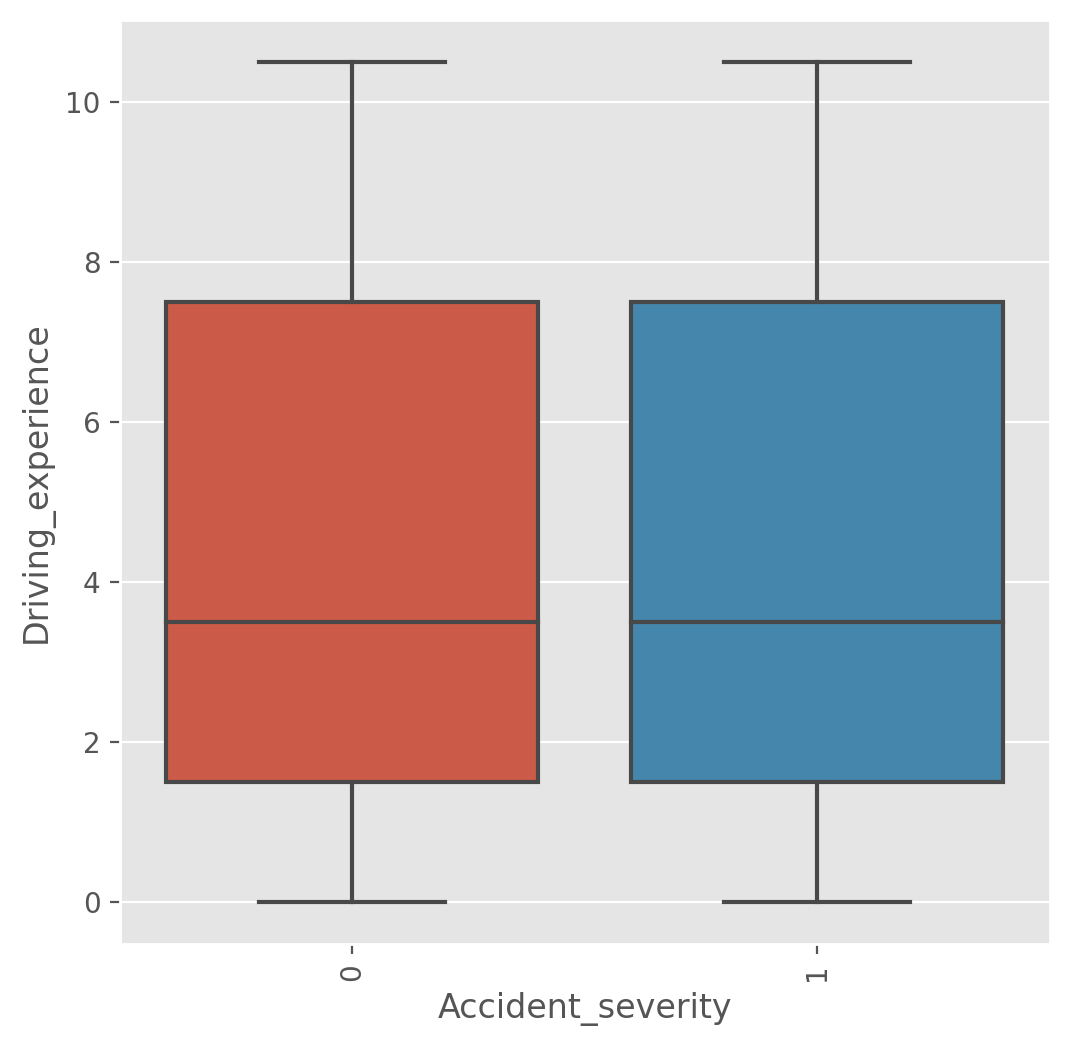

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6,6))
sns.boxplot(x = 'Accident_severity', y = 'Driving_experience' , data = accidents)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '17'),
  Text(2, 0, '24'),
  Text(3, 0, '40.5'),
  Text(4, 0, '60')])

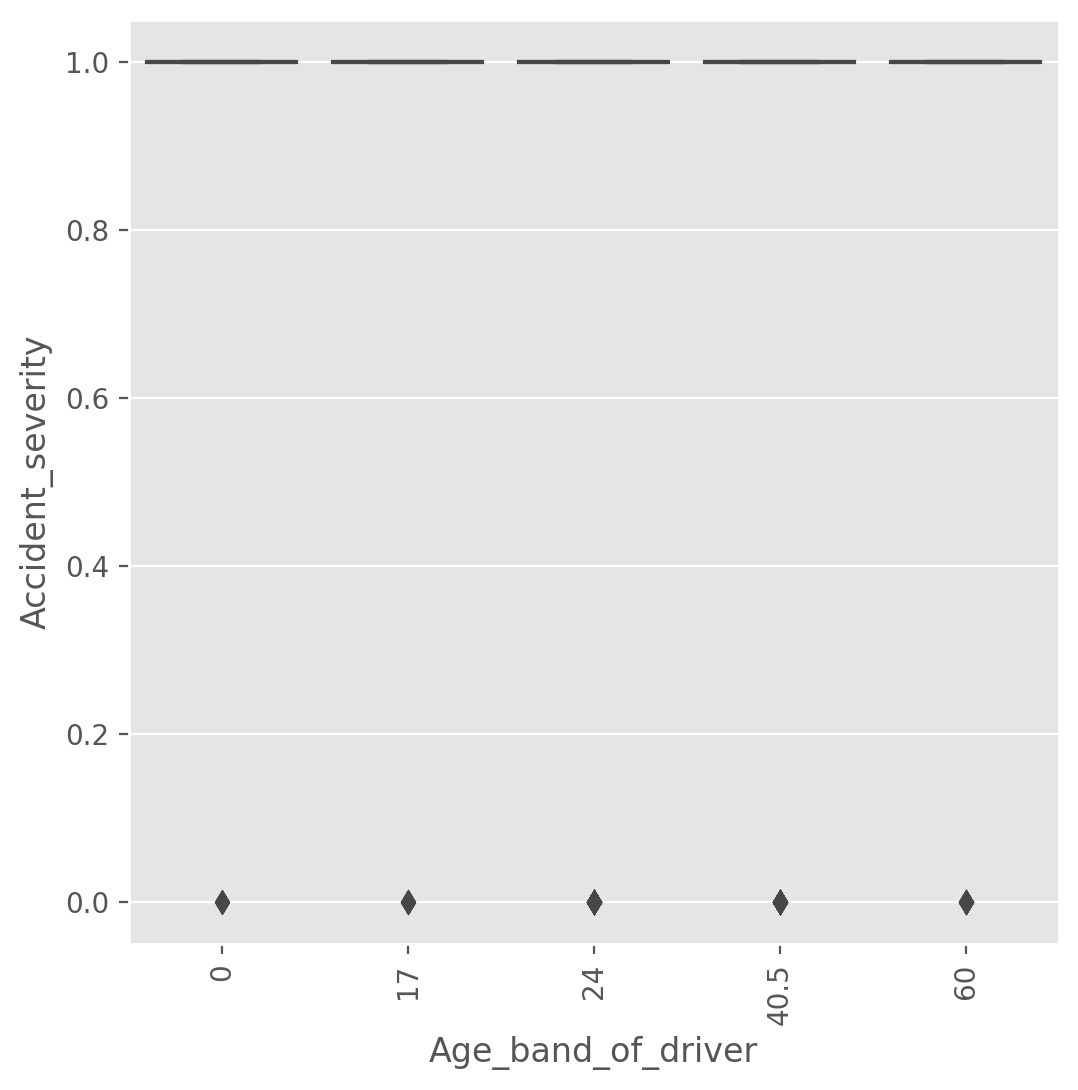

In [51]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'Age_band_of_driver', y = 'Accident_severity' , data = accidents)
plt.xticks(rotation=90)


In [55]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import os
import io
def resample(dat, col, n):
    return pd.concat([dat[dat[col]==1].sample(n, replace = True),
                   dat[dat[col]==0].sample(n)], axis=0)

In [57]:
#df_bl = resample(accidents, 'Accident_severity', 10000)
#print('resampled data:', df_bl.Accident_severity.value_counts())

In [58]:
new_dataset = accidents.dropna()
new_dataset.isnull().sum()

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

In [59]:
#Machine Learning 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report,accuracy_score

print("done")

done


In [60]:
#ad_data=pd.read_csv('C:\\Users\\Saku\\Downloads\\new1cleaned.csv')
from sklearn.model_selection import train_test_split
x=accidents[['Age_band_of_driver', 'Sex_of_driver','Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Cause_of_accident']]
y=accidents['Accident_severity']
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.2)


In [61]:
# Random Forset 
random_forest = RandomForestClassifier(n_estimators = 14, criterion="gini")
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)
acc_random_forest1 = round(random_forest.score(X_test,y_test)*100,2)
sk_report = classification_report(
    digits = 6,
    y_true = y_test,
    y_pred = Y_pred)
print("Accuracy", acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True )
print("done")

Accuracy 98.54
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000        34
           1   0.986190  0.999177  0.992641      2430

    accuracy                       0.985390      2464
   macro avg   0.493095  0.499588  0.496321      2464
weighted avg   0.972582  0.985390  0.978944      2464

done


In [62]:
cm= confusion_matrix(y_test, Y_pred) 
print(cm)

[[   0   34]
 [   2 2428]]


In [63]:
accidents.shape

(12316, 15)

In [64]:
#Logistic Regression 
x = accidents.iloc[:, [0, 13]].values
  
# output
y = accidents.iloc[:, 14].values

In [65]:
from sklearn.model_selection import train_test_split
  
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.20, random_state=0)

In [66]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
  
print (xtrain[0:1, :])

[[ 0.58061175 -0.77818263]]


In [67]:
#multi_class='multinomial', solver='lbfgs'
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest) 

In [68]:
y_pred = classifier.predict(xtest) 

In [69]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[   0   31]
 [   0 2433]]


In [70]:
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9874188311688312


In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def splitdataset(accidents):
  
    # Separating the target variable
    X = accidents.iloc[:, [0, 13]].values
  
    # output
    Y = accidents.iloc[:, 14].values

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.2, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test
      
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini



# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
    
# Driver code
def main():
      
    # Building Phase
    # data = accidents 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(accidents)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
    
    #print("Results Using Entropy:")
    # Prediction using entropy
    #y_pred_entropy = prediction(X_test, clf_entropy)
    #cal_accuracy(y_test, y_pred_entropy)
      
    
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[1 1 1 ... 1 1 1]
Confusion Matrix:  [[   0   22]
 [   0 2442]]
Accuracy :  99.10714285714286
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.99      1.00      1.00      2442

    accuracy                           0.99      2464
   macro avg       0.50      0.50      0.50      2464
weighted avg       0.98      0.99      0.99      2464



[1 1 1 ... 1 1 1]
136
9716
Gini : -19268.214693877555
Accuracy is:  1.0


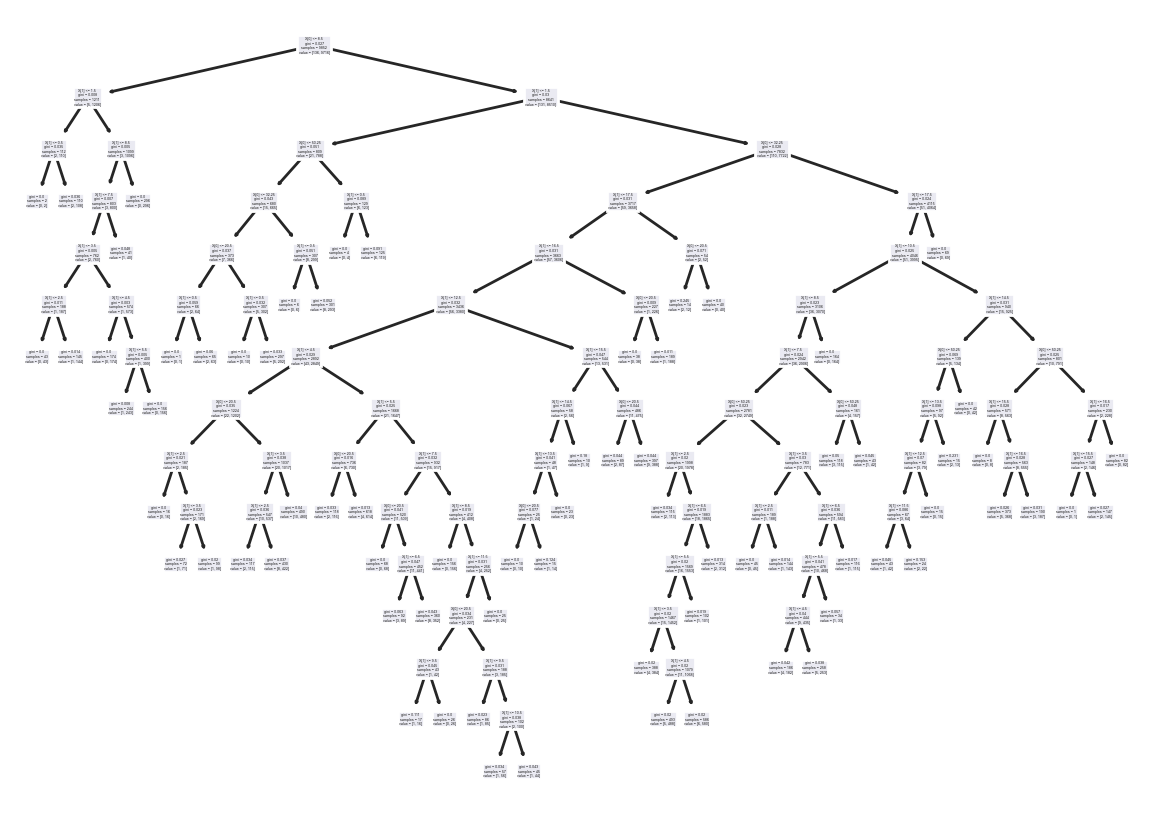

In [95]:
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.model_selection import train_test_split

X = accidents.iloc[:, [0, 13]].values
  
    # output
Y = accidents.iloc[:, 14].values

    # Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split( 
X, Y, test_size = 0.2, random_state = 100)
      
#return X, Y, X_train, X_test, y_train, y_test


model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

predicted_value = model.predict(X_test)
print(predicted_value)

tree.plot_tree(model)

zeroes = 0
ones = 0
for i in range(0, len(y_train)):
    if y_train[i] == 0:
        zeroes += 1
    else:
        ones += 1

print(zeroes)
print(ones)

val = 1 - ((zeroes/70)*(zeroes/70) + (ones/70)*(ones/70))
print("Gini :", val)

match = 0
UnMatch = 0

for i in range(30):
    if predicted_value[i] == y_test[i]:
        match += 1
    else:
        UnMatch += 1

accuracy = match/30
print("Accuracy is: ",accuracy)


[1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0]
32
38
Gini : 0.49632653061224496
Accuracy is:  0.9


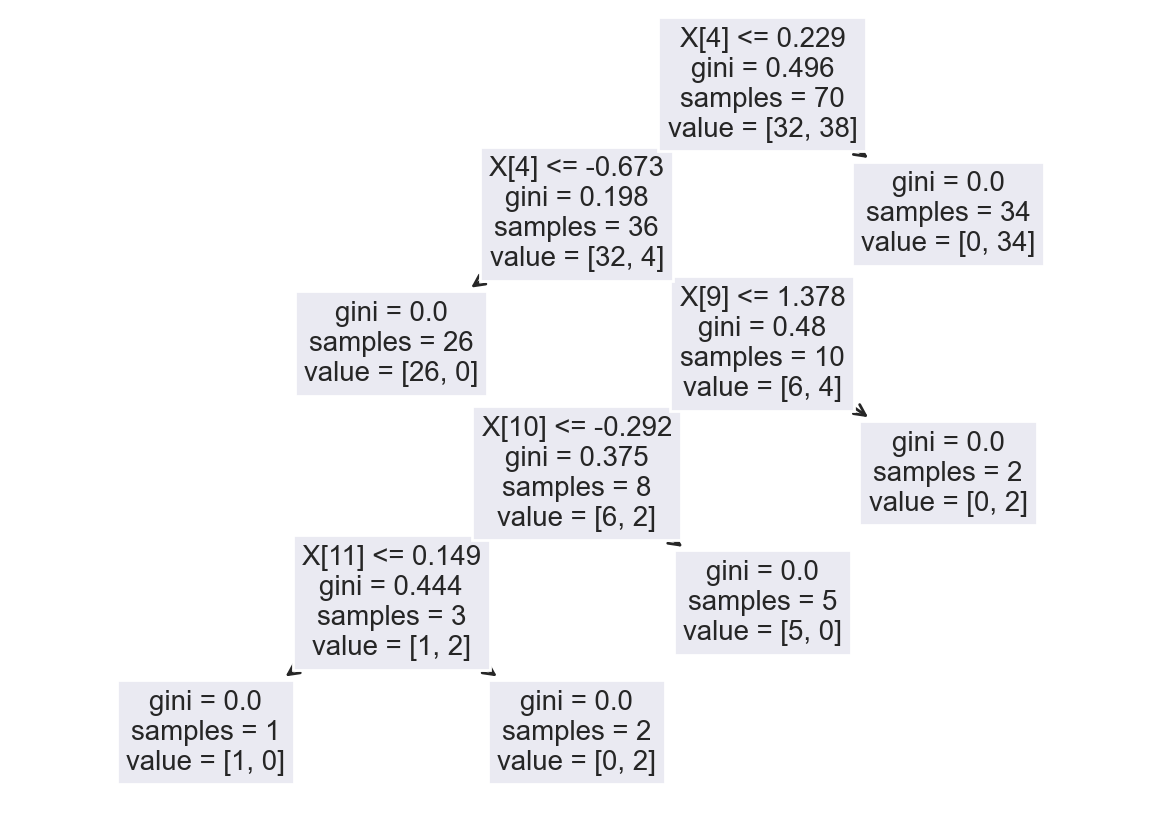

In [94]:
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.model_selection import train_test_split

X, t = make_classification(100, 13, n_classes=2, shuffle=True, random_state=10)
X_train, X_test, t_train, t_test = train_test_split(
    X, t, test_size=0.3, shuffle=True, random_state=1)

model = tree.DecisionTreeClassifier()
model = model.fit(X_train, t_train)

predicted_value = model.predict(X_test)
print(predicted_value)

tree.plot_tree(model)

zeroes = 0
ones = 0
for i in range(0, len(t_train)):
    if t_train[i] == 0:
        zeroes += 1
    else:
        ones += 1

print(zeroes)
print(ones)

val = 1 - ((zeroes/70)*(zeroes/70) + (ones/70)*(ones/70))
print("Gini :", val)

match = 0
UnMatch = 0

for i in range(30):
    if predicted_value[i] == t_test[i]:
        match += 1
    else:
        UnMatch += 1

accuracy = match/30
print("Accuracy is: ",accuracy)


In [74]:
row = [24,2,2,1,1.5,3,1,1,1,1,3,1,3]
yhat = model.predict([row])
# summarize the predicted class
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def splitdataset(accidents):
  
    # Separating the target variable
    X = accidents.iloc[:, [0, 13]].values
  
    # output
    Y = accidents.iloc[:, 14].values

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.2, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test
      
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini



# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred


    
# Driver code
def main():
      
    # Building Phase
    # data = accidents 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(accidents)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    #cal_accuracy(y_test, y_pred_gini)
    
    #print("Results Using Entropy:")
    # Prediction using entropy
    #y_pred_entropy = prediction(X_test, clf_entropy)
    #cal_accuracy(y_test, y_pred_entropy)
      
    
if __name__=="__main__":
    main()   

Results Using Gini Index:
Predicted values:
[1 1 1 ... 1 1 1]


In [76]:
# SVM 
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score 

# Importing the dataset from the sklearn library into a local variable called dataset
#dataset = load_digits()

X = accidents.iloc[:, [0, 13]].values
  
    # output
Y = accidents.iloc[:, 14].values

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.2, random_state = 100)
      
#return X, Y, X_train, X_test, y_train, y_test

# Splitting the data test into train 70% and test 30%.
# x_train, y_train are training data and labels respectively 
# x_test, y_test are testing data and labels respectively 
#x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.20, random_state=4)

# Making the SVM Classifer
Classifier = SVC(kernel="linear")

# Training the model on the training data and labels
Classifier.fit(X_train, y_train)

# Using the model to predict the labels of the test data
y_pred = Classifier.predict(X_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for SVM is: 99.10714285714286
Confusion Matrix
[[   0   22]
 [   0 2442]]


In [77]:
accidents.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,24,2,1,1,1.5,0,1,1,1,1,1,1,1,1,1
1,40.5,2,2,1,10.5,1,1,1,1,1,2,1,1,2,1
2,24,2,2,1,1.5,3,1,1,1,1,3,1,1,3,1
3,24,2,2,1,7.5,3,2,2,2,1,2,1,1,4,1
4,24,2,2,1,3.5,3,2,1,2,1,2,1,1,2,1


In [78]:
x = accidents.iloc[:, [0, 13]].values
  
# output
y = accidents.iloc[:, 14].values


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier,x,y,cv = 10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

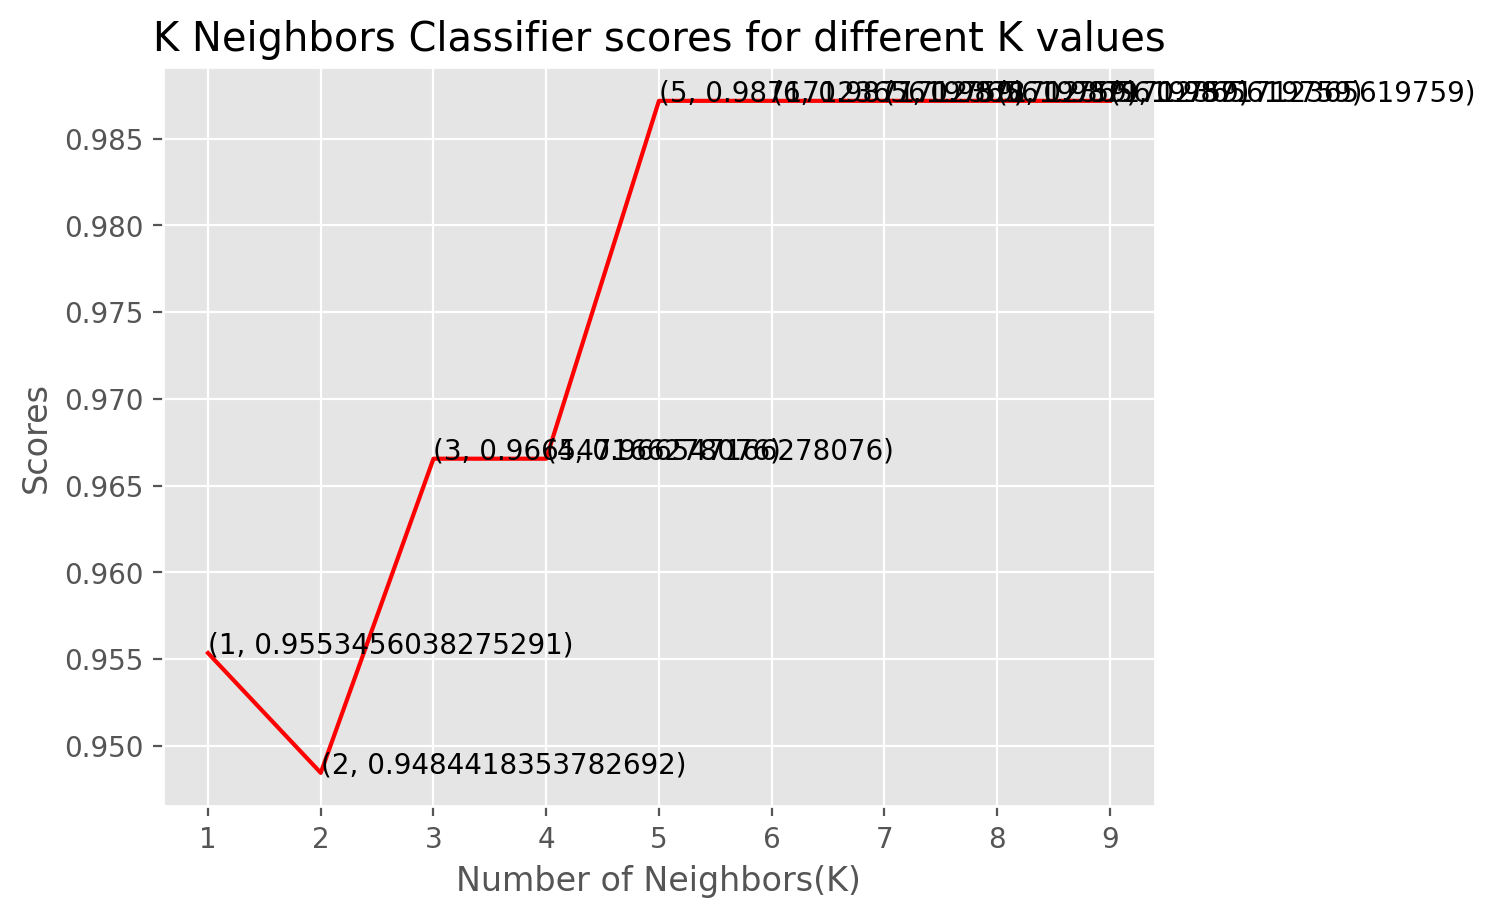

In [80]:
plt.plot([k for k in range(1,10)], knn_scores, color='red')
for i in range (1,10):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,10)])
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [81]:
knn_scores

[0.9553456038275291,
 0.9484418353782692,
 0.966547166278076,
 0.966547166278076,
 0.9871712365619759,
 0.9871712365619759,
 0.9871712365619759,
 0.9871712365619759,
 0.9871712365619759]

In [82]:
knn_classifier = KNeighborsClassifier(n_neighbors = 9)
score = cross_val_score(knn_classifier,x,y,cv = 10)
knn_scores.append(score.mean())

In [83]:
score.mean()

0.9871712365619759

Coefficients:  [-5.66444933e-05  4.70119903e-05]
Variance score: 0.0005719380701179055


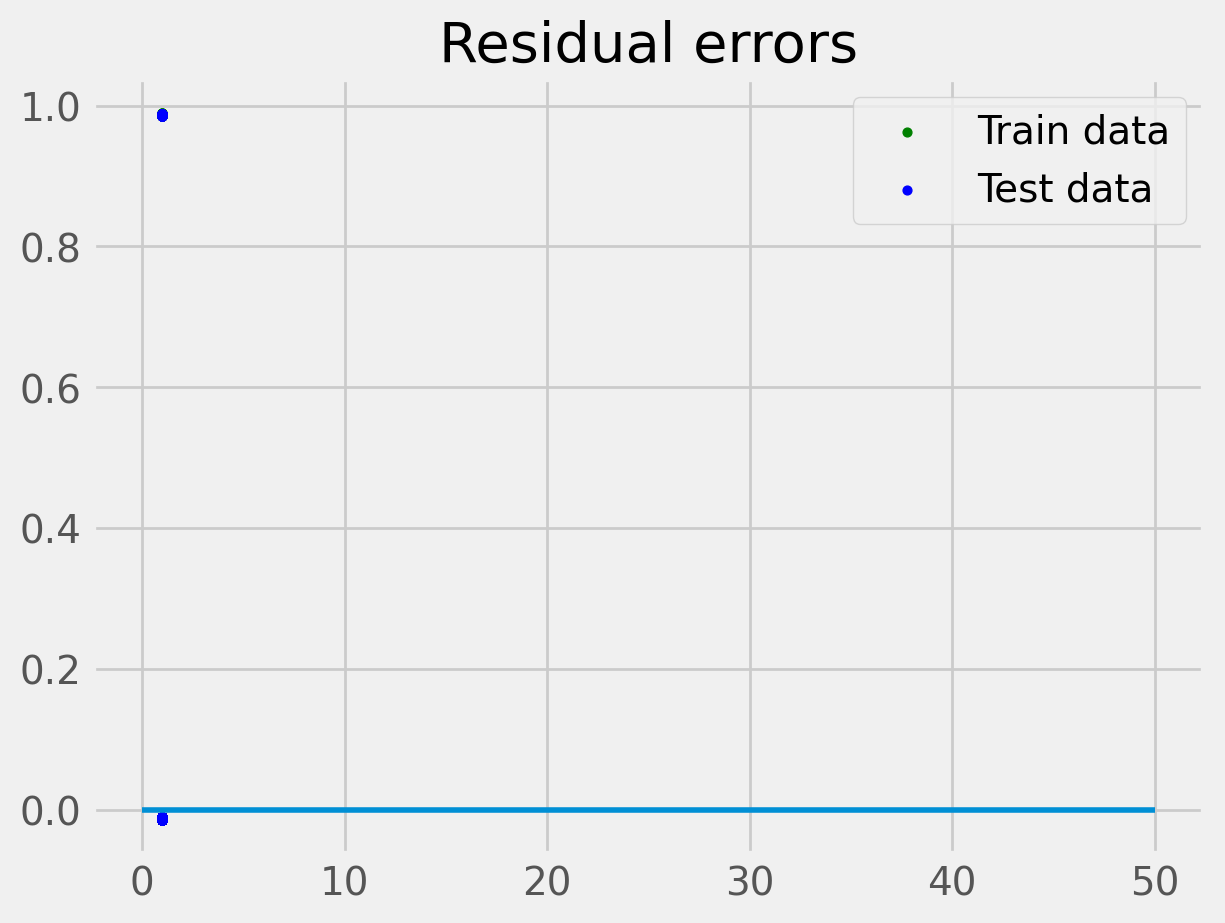

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

# load the boston dataset
#boston = accidents.load_boston(return_X_y=False)
#Logistic Regression 
X = accidents.iloc[:, [0, 13]].values

y = accidents.iloc[:, 14].values

# defining feature matrix(X) and response vector(y)
import matplotlib.pyplot as plt
import numpy as np

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()

In [85]:
#Kmeans clustering 
from sklearn.cluster import KMeans
X = accidents.iloc[:,[0,13]].values


# In[78]:


print(X)

[[24 1]
 [40.5 2]
 [24 3]
 ...
 [60 4]
 [24 6]
 [24 4]]


In [86]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

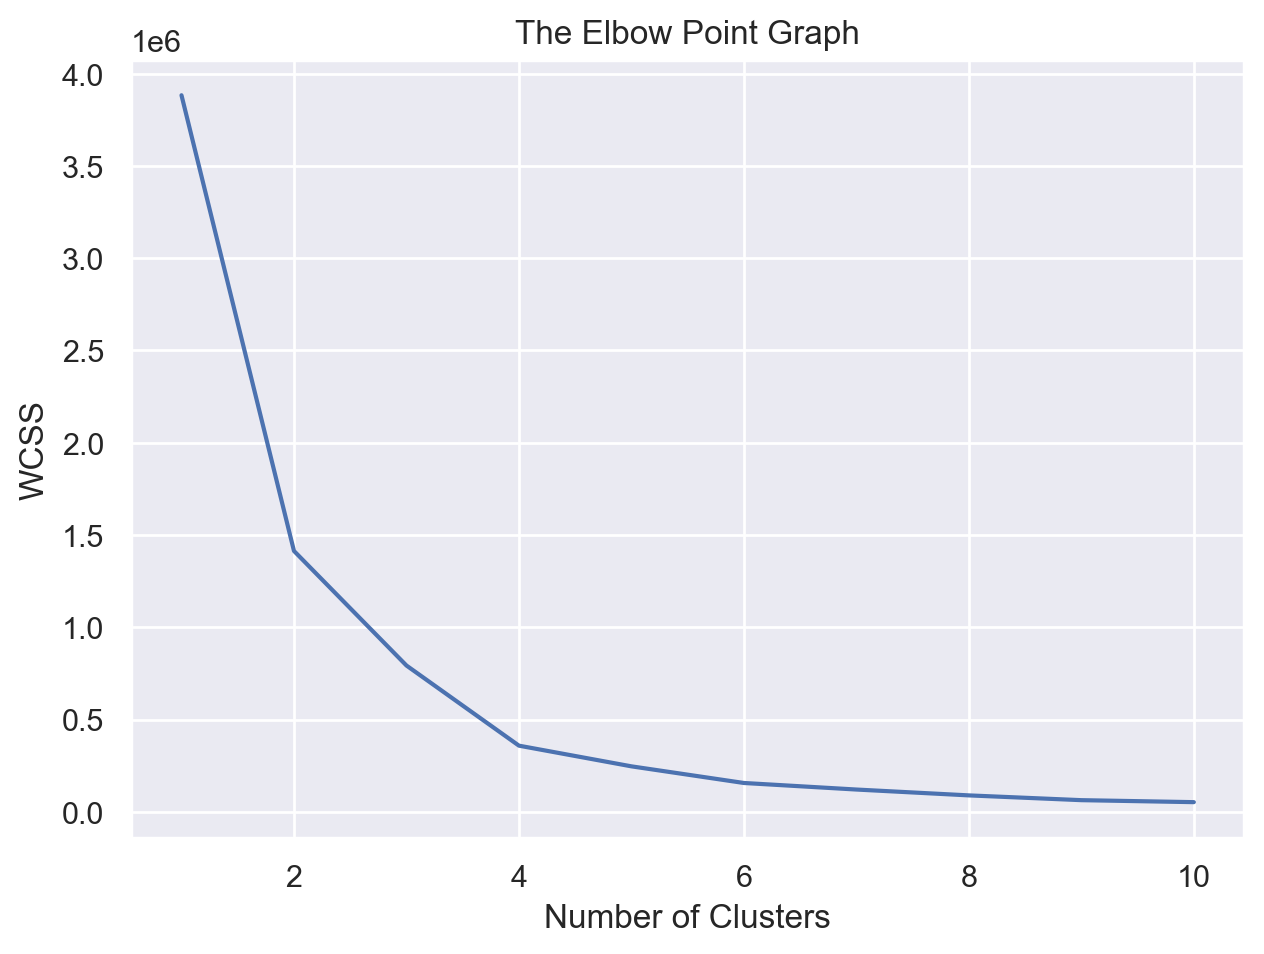

In [87]:
#plot elbow graph 
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [88]:
#Optimal Number of clusters = 4

#Training the k-means Cluaatering Model
kmeans = KMeans(n_clusters=6, init='k-means++', random_state = 0)
#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[0 2 0 ... 1 0 0]


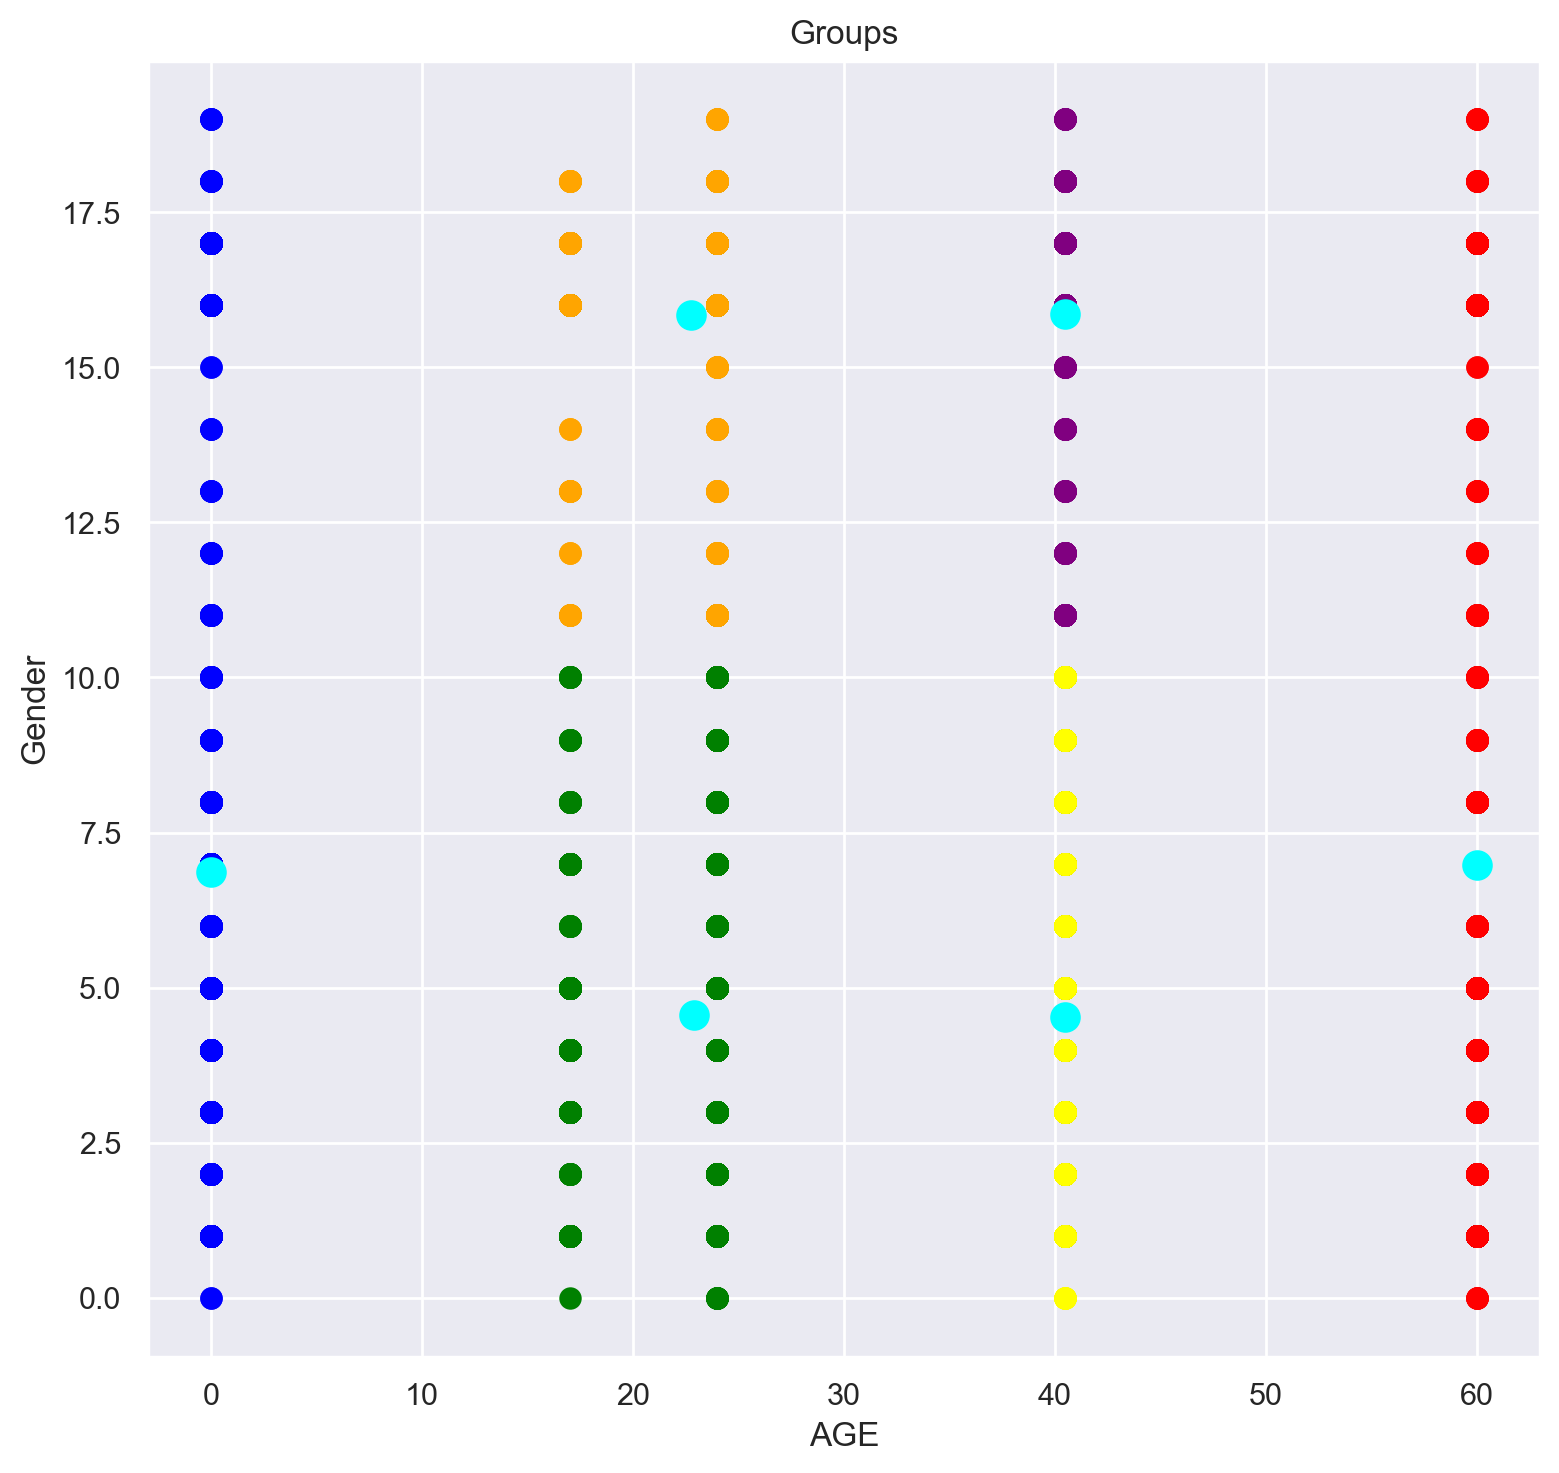

In [89]:
#plotting all the clusters and their centroids 
plt.figure(figsize = (8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label = 'Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label = 'Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label = 'Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='purple', label = 'Cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='orange', label = 'Cluster 6')

#plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label = 'Cluster 5')
#plot the centroids 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label= 'Centroids')
plt.title('Groups')
plt.xlabel('AGE')
plt.ylabel('Gender')
plt.show()


In [90]:

from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(accidents['Accident_severity'],kmeans.labels_))
print(classification_report(accidents['Accident_severity'],kmeans.labels_))


ConfusionMatrix [[  53   24   41    6   13   21]
 [3912 1561 3146 1542  887 1110]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.01      0.34      0.03       158
           1       0.98      0.13      0.23     12158
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.13     12316
   macro avg       0.17      0.08      0.04     12316
weighted avg       0.97      0.13      0.22     12316



In [91]:
#Building a predictive model
input_data = (24,2,2,1,1.5,3,1,1,1,1,3,1,3)
#change the input data to a numpy array 
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

[1]


In [92]:

accidents.shape

(12316, 15)

In [93]:
accidents.size

184740